<br></br><br></br>
# Chapter 9 - 담화 분석 Discourse Analysis 
Knowing Is Believing (아는 것은 믿는 것이다)
1. 담화 분석 소개
2. 중심화 이론을 사용한 담화분석
3. 대용어 복원

<br></br>
## 1 담화 분석
NER(Named-entity recognition), AR(Anaphora Resolution) 담화분석
1. Discourse Representation Theory (DRT) - AR을 수행하는 방법을 제공
2. Discourse Representation Structure (DRS) - 담화의 의미를 제공

<img src="https://sourcecodebrowser.com/w3af/1.0~rc2svn3429/classextlib_1_1nltk_1_1sem_1_1logic_1_1_expression__coll__graph.png" align="left">

### 01 First Order Predicate Logic (FOPL) 
명제 논리의 사실을 확장가능, text를 선형으로 변환한다

In [1]:
import nltk
expr_read = nltk.sem.DrtExpression.fromstring
expr1 = expr_read('([x], [John(x), Went(x)])')
print(expr1)

# expr1.draw()   # 이미지로 출력
expr1.fol()

([x],[John(x), Went(x)])


<ExistsExpression exists x.(John(x) & Went(x))>

In [2]:
import nltk
expr_read = nltk.sem.DrtExpression.fromstring
expr2 = expr_read('([x,y], [John(x), Went(x),Sam(y),Meet(x,y)])')

print(expr2)
#expr2.draw()
expr2.fol()

([x,y],[John(x), Went(x), Sam(y), Meet(x,y)])


<ExistsExpression exists x y.(John(x) & Went(x) & Sam(y) & Meet(x,y))>

In [3]:
import nltk
expr_read = nltk.sem.DrtExpression.fromstring
expr3 = expr_read('([x], [John(x), eats(x)])+ ([y],[Sam(y),eats(y)])')

print(expr3)
#expr3.draw()
expr3.simplify()

(([x],[John(x), eats(x)]) + ([y],[Sam(y), eats(y)]))


<DRS ([x,y],[John(x), eats(x), Sam(y), eats(y)])>

In [4]:
import nltk
expr_read = nltk.sem.DrtExpression.fromstring
expr4 = expr_read('([],[(([x],[student(x)])->([y],[book(y),read(x,y)]))])')

expr4.fol()

<AllExpression all x.(student(x) -> exists y.(book(y) & read(x,y)))>

In [5]:
import nltk
expr_read = nltk.sem.DrtExpression.fromstring
expr5 = expr_read('([x,y],[ram(x),food(y),eats(x,y)])')
expr6 = expr_read('([u,z],[PRO(u),coffee(z),drinks(u,z)])')

expr7 = expr5 + expr6
print(expr7.simplify())
print(expr7.simplify().resolve_anaphora())

([u,x,y,z],[ram(x), food(y), eats(x,y), PRO(u), coffee(z), drinks(u,z)])
([u,x,y,z],[ram(x), food(y), eats(x,y), (u = [x,y,z]), coffee(z), drinks(u,z)])


### 02 중심화 이론을 사용한 담화분석
중심화 (Centering Therory): 참가자의 관심, 사고방식, 담화의 일관성에 영향. Corpus 주석의 첫 단계에 해당(AR도 포함)
1. 담화 참가자와 담화의 목적/ 의도간의 상호작용
2. 참가자의 태도
3. 담화 구조

### 03 대용어 복원 Anaphora resolution
대명사, 명사구가 지칭하는 구체적 개체(NER)를 발견
1. 대명사
2. 명확한 명사구
3. 수량사/서수

<br></br><br></br>
# Chapter 10 - Evaluation of NLP Systems (NLP 시스템의 평가)
Analyzing Performance(성능분석)
1. NLP 시스템 평가
2. NLP 도구의 평가(POS Tagger, Stemmer)
3. 골드 데이터를 사용한 Parser
4. IR 시스템의 평가
5. 오류 식별 메트릭
6. 어휘 매칭 기반 메트릭
7. 구분 매칭 기반 메트릭
8. 얕은 의미 매칭을 사용한 메트릭

<br></br>
## 1 NLP 시스템의 평가 필요성
NLP 형태소 분석 알고리즘은 모듈의 오류를 초기에 식별하는 용도로 활용

http://ra2kstar.tistory.com/170

### 01 Unigram POS 태거
(NLP도구 1)

In [18]:
import nltk
from nltk.corpus import brown

# token에 tag 포함 [ (token, tag), (token, tag)... ]
sentences = brown.tagged_sents(categories = 'news')  
unigram_sent = nltk.UnigramTagger(sentences)

# token만 포함     [ token, token, token....]
sent = brown.sents(categories = 'news')              
unigram_sent.tag(sent[2008])  # 4632개 token 중 '2008'번을 tag를 덧붙여 추출

[('Others', 'NNS'),
 (',', ','),
 ('which', 'WDT'),
 ('are', 'BER'),
 ('reached', 'VBN'),
 ('by', 'IN'),
 ('walking', 'VBG'),
 ('up', 'RP'),
 ('a', 'AT'),
 ('single', 'AP'),
 ('flight', 'NN'),
 ('of', 'IN'),
 ('stairs', 'NNS'),
 (',', ','),
 ('have', 'HV'),
 ('balconies', 'NNS'),
 ('.', '.')]

In [8]:
# 훈련 데이터와 테스트 데이터 검증
unigram_sent.evaluate(sentences)

0.9349006503968017

In [14]:
# import nltk
# from nltk.corpus import brown
sentences = brown.tagged_sents(categories = 'news')
sz = int(len(sentences)*0.8)
sz  # 데이터 Train/ Test 분리

3698


In [16]:
training_sents = sentences[:sz]
testing_sents  = sentences[sz:]
unigram_tagger = nltk.UnigramTagger(training_sents)
unigram_tagger.evaluate(testing_sents)

0.8026879907509996

### 02 N-gram POS 태거
(NLP도구 2)

In [17]:
# import nltk
# from nltk.corpus import brown
sentences = brown.tagged_sents(categories = 'news')
sz = int(len(sentences) * 0.8)
training_sents = sentences[:sz]
testing_sents  = sentences[sz:]
bigram_tagger  = nltk.UnigramTagger(training_sents)
bigram_tagger  = nltk.BigramTagger(training_sents)
bigram_tagger.tag(sentences[2008])

[(('Others', 'NNS'), None), ((',', ','), None), (('which', 'WDT'), None), (('are', 'BER'), None), (('reached', 'VBN'), None), (('by', 'IN'), None), (('walking', 'VBG'), None), (('up', 'IN'), None), (('a', 'AT'), None), (('single', 'AP'), None), (('flight', 'NN'), None), (('of', 'IN'), None), (('stairs', 'NNS'), None), ((',', ','), None), (('have', 'HV'), None), (('balconies', 'NNS'), None), (('.', '.'), None)]


In [29]:
un_sent = sentences[4203]
bigram_tagger.tag(un_sent)

[(('The', 'AT'), None),
 (('population', 'NN'), None),
 (('of', 'IN'), None),
 (('the', 'AT'), None),
 (('Congo', 'NP'), None),
 (('is', 'BEZ'), None),
 (('13.5', 'CD'), None),
 (('million', 'CD'), None),
 ((',', ','), None),
 (('divided', 'VBN'), None),
 (('into', 'IN'), None),
 (('at', 'IN'), None),
 (('least', 'AP'), None),
 (('seven', 'CD'), None),
 (('major', 'JJ'), None),
 (('``', '``'), None),
 (('culture', 'NN'), None),
 (('clusters', 'NNS'), None),
 (("''", "''"), None),
 (('and', 'CC'), None),
 (('innumerable', 'JJ'), None),
 (('tribes', 'NNS'), None),
 (('speaking', 'VBG'), None),
 (('400', 'CD'), None),
 (('separate', 'JJ'), None),
 (('dialects', 'NNS'), None),
 (('.', '.'), None)]

In [30]:
print(bigram_tagger.evaluate(testing_sents))

0.09186376993111421


### 03 Method를 Bootstrap으로 보완
(NLP도구 3) : Back-off 알고리즘으로 보완(교차삽입)

In [31]:
# import nltk
# from nltk.corpus import brown
sentences = brown.tagged_sents(categories = 'news')
sz = int(len(sentences) * 0.8)

training_sents = sentences[:sz]
testing_sents  = sentences[sz:]

s0 = nltk.DefaultTagger('NNP')
s1 = nltk.UnigramTagger(training_sents, backoff = s0)
s2 = nltk.BigramTagger(training_sents, backoff = s1)
s2.evaluate(testing_sents)

0.8117443036755142

<br></br>
## 2 행태학을 활용한 범주의 분석
1. 행태학 단서
2. 구문 단서
3. 의미 단서

언어학자들은 위의 3가지 단서를 활용하여 문장의 범주를 결정하고자 한다

### 01 행태학 단서

Morphological clues 는 단어의 범주를 결정하기 위해, 

접두사(prefix), 접미사(suffix), 삽입사(infix), 접사정보(affix information)를 사용한다

ex ) -ity, -ness, -ment 등 품사를 바꾸는 접사

### 02 구문 단서
Syntactic clues 는 명사뒤 형용사, 동사뒤 부사 등

문법적인 내용을 활용하여 결정을 한다

### 03 의미 단서
Semantic information 

### 04 청크 파서
Chunk Parser

In [32]:
# Chunk 파서의 기본형태
#import nltk
chunkparser = nltk.RegexpParser("")
print(nltk.chunk.accuracy(chunkparser, 
                          nltk.corpus.conll2000.chunked_sents('train.txt', 
                                                              chunk_types = ('NP',))))

0.44084599507856814


In [ ]:
# CD,JJ 등과 같은 '태그'를 찾는 Naive Chunk Parser의 평가에 기초한 분석
# import nltk
grammar = r"NP: {<[CDJNP].*>+}"
cp = nltk.RegexpParser(grammar)
print(nltk.chunk.accuracy(cp, 
                          nltk.corpus.conll2000.chunked_sents('train.txt', 
                                                              chunk_types=('NP',))))

In [45]:
# Chunk 된 데이터에 대한 
# '조건부 도수 분포'conditional frequency distribution에 근거한 계산
# https://stackoverflow.com/questions/31270374/inc-object-with-nltk-for-py-2-7
def chunk_tags(train):
    cfd = nltk.ConditionalFreqDist() # chunk freqdist
    for t in train:
        for prev_word, tag, chunktag in nltk.chunk.tree2conlltags(t):
            if chunktag == "O":
                #cfreqdist[tag].inc(False)
                cfd[prev_word][False] += 1
            else:
                #cfreqdist[tag].inc(True)
                cfd[prev_word][True] += 1
    return [tag   for tag in cfd.conditions()    if cfd[tag].max() == True]

training_sents = nltk.corpus.conll2000.chunked_sents('train.txt', chunk_types=('NP',))
chunk_tags(training_sents)[::1000]

['Confidence',
 'Forte',
 'Waterbury',
 'skepticism',
 'Meridian',
 '792',
 'decliners',
 'aftershock-damping',
 'Exabyte',
 'Hans-Dietrich',
 'busload',
 'closure',
 'laborer',
 '4.9',
 'Sweezey']

### 05 청크 파서의 평가
Chunk Parser

guessed 와 correct가 사용된다 (train/ test 대신)

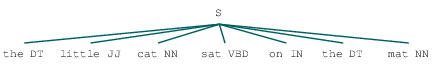

In [46]:
# Chunk 평가를 수행하기 위한 계산
import nltk
correct = nltk.chunk.tagstr2tree("[ the/DT little/JJ cat/NN ] sat/VBD on/IN [ the/DT mat/NN ]")
correct.flatten()

In [50]:
grammar = r"NP: {<[CDJNP].*>+}"
cp = nltk.RegexpParser(grammar)

grammar = r"NP: {<PRP|DT|POS|JJ|CD|N.*>+}"
chunk_parser = nltk.RegexpParser(grammar)

tagged_tok = [("the", "DT"), ("little", "JJ"), ("cat", "NN"),("sat", "VBD"), ("on", "IN"), ("the", "DT"), ("mat", "NN")]
chunkscore = nltk.chunk.ChunkScore()
guessed = cp.parse(correct.flatten())
chunkscore.score(correct, guessed)

# print 함수를 사용해야 결과를 구체적으로 볼 수 있다.
print(chunkscore)  

ChunkParse score:
    IOB Accuracy: 100.0%%
    Precision:    100.0%%
    Recall:       100.0%%
    F-Measure:    100.0%%


In [ ]:
# Uni-gram, Bi-gram을 활용한 Chunk 평가

In [ ]:
<<<< 295 page >>>>>

In [ ]:
>>>chunker_data = [[(t,c) for w,t,c in nltk.chunk.
tree2conlltags(chtree)]
>>>
for chtree in nltk.corpus.conll2000.chunked_
sents('train.txt')]
>>> unigram_chunk = nltk.UnigramTagger(chunker_data)
>>> print nltk.tag.accuracy(unigram_chunk, chunker_data)
0.781378851068
>>> bigram_chunk = nltk.BigramTagger(chunker_data, backoff=unigram_
chunker)
>>> print nltk.tag.accuracy(bigram_chunk, chunker_data)
0.893220987404

In [ ]:
>>> from nltk.corpus import brown
>>> suffix_freqdist = nltk.FreqDist()
>>> for wrd in brown.words():
...
wrd = wrd.lower()
...
suffix_freqdist[wrd[-1:]] += 1
...
suffix_fdist[wrd[-2:]] += 1
...
suffix_fdist[wrd[-3:]] += 1
>>> common_suffixes = [suffix for (suffix, count) in suffix_freqdist.
most_common(100)]
>>> print(common_suffixes)
['e', ',', '.', 's', 'd', '

In [ ]:
>>> def pos_feature(wrd):
...
feature = {}
...
for suffix in common_suffixes:
...
feature['endswith({})'.format(suffix)] = wrd.lower().
endswith(suffix)
...
return feature
>>> tagged_wrds = brown.tagged_wrds(categories='news')
>>> featureset = [(pos_feature(n), g) for (n,g) in tagged_wrds]
>>> size = int(len(featureset) * 0.1)
>>> train_set, test_set = featureset[size:], featureset[:size]
>>> classifier1 = nltk.DecisionTreeClassifier.train(train_set)
>>> nltk.classify.accuracy(classifier1, test_set)
0.62705121829935351
>>> classifier.classify(pos_features('cats'))
'NNS'
>>> print(classifier.pseudocode(depth=4))
if endswith(,) == True: return ','
if endswith(,) == False:
if endswith(the) == True: return 'AT'
if endswith(the) == False:
if endswith(s) == True:
if endswith(is) == True: return 'BEZ'
if endswith(is) == False: return 'VBZ'
if endswith(s) == False:
if endswith(.) == True: return '.'
if endswith(.) == False: return 'NN'

In [ ]:
>>> import nltk
>>> from nltk.corpus import brown
>>> sentences = brown.tagged_sents(categories='news')
>>> sent = brown.sents(categories='news')
>>> pattern = [
(r'.*ing$', 'VBG'),
# for gerunds
(r'.*ed$', 'VBD'),
# for simple past
    (r'.*es$', 'VBZ'),
# for 3rd singular present
(r'.*ould$', 'MD'),
# for modals
(r'.*\'s$', 'NN$'),
# for possessive nouns
(r'.*s$', 'NNS'),
# for plural nouns
(r'^-?[0-9]+(.[0-9]+)?$', 'CD'), # for cardinal numbers
(r'.*', 'NN')
# for nouns (default)
]
>>> regexpr_tagger = nltk.RegexpTagger(pattern)
>>> regexpr_tagger.tag(sent[3])
[('``', 'NN'), ('Only', 'NN'), ('a', 'NN'), ('relative', 'NN'),
('handful', 'NN'), ('of', 'NN'), ('such', 'NN'), ('reports', 'NNS'),
('was', 'NNS'), ('received', 'VBD'), ("''", 'NN'), (',', 'NN'),
('the', 'NN'), ('jury', 'NN'), ('said', 'NN'), (',', 'NN'), ('``',
'NN'), ('considering', 'VBG'), ('the', 'NN'), ('widespread', 'NN'),
('interest', 'NN'), ('in', 'NN'), ('the', 'NN'), ('election', 'NN'),
(',', 'NN'), ('the', 'NN'), ('number', 'NN'), ('of', 'NN'), ('voters',
'NNS'), ('and', 'NN'), ('the', 'NN'), ('size', 'NN'), ('of', 'NN'),
('this', 'NNS'), ('city', 'NN'), ("''", 'NN'), ('.', 'NN')]
>>> regexp_tagger.evaluate(sentences)
0.20326391789486245

In [ ]:
>>> import nltk
>>> from nltk.corpus import brown
>>> freqd = nltk.FreqDist(brown.words(categories='news'))
>>> cfreqd = nltk.ConditionalFreqDist(brown.tagged_
words(categories='news'))
>>> mostfreq_words = freqd.most_common(100)
>>> likelytags = dict((word, cfreqd[word].max()) for (word, _) in
mostfreq_words)
>>> baselinetagger = nltk.UnigramTagger(model=likelytags)
>>> baselinetagger.evaluate(brown_tagged_sents)
0.45578495136941344
>>> sent = brown.sents(categories='news')[3]
>>> baselinetagger.tag(sent)
[('``', '``'), ('Only', None), ('a', 'AT'), ('relative', None),
('handful', None), ('of', 'IN'), ('such', None), ('reports', None),
 >>> baselinetagger = nltk.UnigramTagger(model=likely_tags,
...
backoff=nltk.
DefaultTagger('NN'))
def performance(cfreqd, wordlist):
lt = dict((word, cfreqd[word].max()) for word in wordlist)
baseline_tagger = nltk.UnigramTagger(model=lt, backoff=nltk.
DefaultTagger('NN'))
return baseline_tagger.evaluate(brown.tagged_
sents(categories='news'))
def display():
import pylab
word_freqs = nltk.FreqDist(brown.words(categories='news')).most_
common()
words_by_freq = [w for (w, _) in word_freqs]
cfd = nltk.ConditionalFreqDist(brown.tagged_
words(categories='news'))
sizes = 2 ** pylab.arange(15)
perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
pylab.plot(sizes, perfs, '-bo')
pylab.title('Lookup Tagger Performance with Varying Model Size')
pylab.xlabel('Model Size')
pylab.ylabel('Performance')
pylab.show()
display()

In [ ]:
>>> import nltk
>>> from nltk.stem.lancaster import LancasterStemmer
>>> stri=LancasterStemmer()
>>> stri.stem('achievement')

In [ ]:
class ConseNPChunkTagger(nltk.TaggerI):
def __init__(self, train_sents):
train_set = []
for tagsent in train_sents:
untagsent = nltk.tag.untag(tagsent)
history = []
for i, (word, tag) in enumerate(tagsent):
featureset = npchunk_features(untagsent, i, history)
train_set.append( (featureset, tag) )
history.append(tag)
self.classifier = nltk.MaxentClassifier.train(
train_set, algorithm='megam', trace=0)
def tag(self, sentence):
history = []
for i, word in enumerate(sentence):
featureset = npchunk_features(sentence, i, history)
tag = self.classifier.classify(featureset)
history.append(tag)
return zip(sentence, history)
class ConseNPChunker(nltk.ChunkParserI): [4]
def __init__(self, train_sents):
tagsent = [[((w,t),c) for (w,t,c) in
nltk.chunk.tree2conlltags(sent)]
for sent in train_sents]
self.tagger = ConseNPChunkTagger(tagsent)
def parse(self, sentence):
tagsent = self.tagger.tag(sentence)
conlltags = [(w,t,c) for ((w,t),c) in tagsent]
return nltk.chunk.conlltags2tree(conlltags)

In [ ]:
# chapter 10 - 8
import nltk
from nltk.corpus import brown
sentences = brown.tagged_sents(categories='news')
sent = brown.sents(categories='news')
pattern = [(r'(January)$','Jan')]
regexpr_tagger = nltk.RegexpTagger(pattern)
print(regexpr_tagger.tag(sent[3]))
print(regexpr_tagger.evaluate(sentences))

In [ ]:
# chapter 10 - 9
import nltk
from nltk.corpus import brown
freqd = nltk.FreqDist(brown.words(categories='news'))
cfreqd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
mostfreq_words = freqd.most_common(100)
likelytags = dict((word, cfreqd[word].max()) for (word, _) in mostfreq_words)
baselinetagger = nltk.UnigramTagger(model=likelytags)

sent = brown.sents(categories='news')[3]
print(baselinetagger.tag(sent))


In [ ]:
# 10.py
import nltk
from nltk.stem.lancaster import LancasterStemmer
stri=LancasterStemmer()
print(stri.stem('achievement'))
